In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm 
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
%matplotlib inline
sns.set_style('darkgrid')

In [65]:
houses = pd.read_csv('C:/Users/Nandha/OneDrive/Documents/SD03Q013/houses_to_rent.csv')
houses.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [66]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10692 non-null  object
 1   area                 10692 non-null  int64 
 2   rooms                10692 non-null  int64 
 3   bathroom             10692 non-null  int64 
 4   parking spaces       10692 non-null  int64 
 5   floor                10692 non-null  object
 6   animal               10692 non-null  object
 7   furniture            10692 non-null  object
 8   hoa (R$)             10692 non-null  int64 
 9   rent amount (R$)     10692 non-null  int64 
 10  property tax (R$)    10692 non-null  int64 
 11  fire insurance (R$)  10692 non-null  int64 
 12  total (R$)           10692 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 1.1+ MB


In [67]:
houses.describe().round(2)

,area,rooms,bathroom,parking spaces,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
count,10692.00,10692.00,10692.00,10692.00,10692.00,10692.00,10692.00,10692.00,10692.00
mean,149.22,2.51,2.24,1.61,1174.02,3896.25,366.70,53.30,5490.49
std,537.02,1.17,1.41,1.59,15592.31,3408.55,3107.83,47.77,16484.73
min,11.00,1.00,1.00,0.00,0.00,450.00,0.00,3.00,499.00
25%,56.00,2.00,1.00,0.00,170.00,1530.00,38.00,21.00,2061.75
50%,90.00,2.00,2.00,1.00,560.00,2661.00,125.00,36.00,3581.50
75%,182.00,3.00,3.00,2.00,1237.50,5000.00,375.00,68.00,6768.00
max,46335.00,13.00,10.00,12.00,1117000.00,45000.00,313700.00,677.00,1120000.00


In [68]:
cols = houses.columns
cols = cols.map(lambda x: x.replace(' ','_') if isinstance(x, (str)) else x)
houses.columns = cols
#change the categorical variables
houses.animal.replace(['acept','not acept'],[1,0], inplace = True)
houses.furniture.replace(['furnished','not furnished'],[1,0], inplace = True)
#change "$" for use queries
houses.rename(columns={'hoa_(R$)' : 'hoa',
'rent_amount_(R$)' : 'rent_amount',
'property_tax_(R$)' : 'property_tax',
'fire_insurance_(R$)' : 'fire_insurance',
'total_(R$)' : 'total'}, inplace = True)

C:\Users\Nandha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Furniture?', ylabel='Count'>

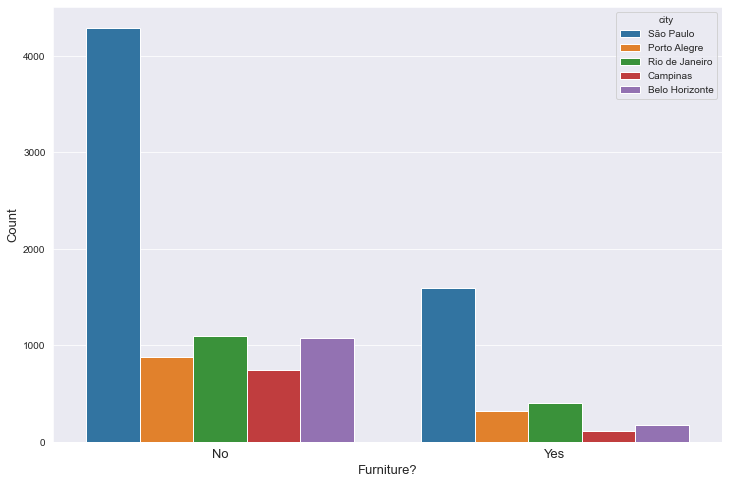

In [69]:
ax = sns.countplot(houses['furniture'], hue = houses['city'])
ax.figure.set_size_inches(12, 8)
ax.set_xlabel('Furniture?', fontsize=13)
ax.set_ylabel('Count', fontsize=13)
ax.set_xticklabels(['No','Yes'], fontsize=13)
ax

<AxesSubplot:xlabel='Acept Animals?', ylabel='Rent Amount (R$)'>

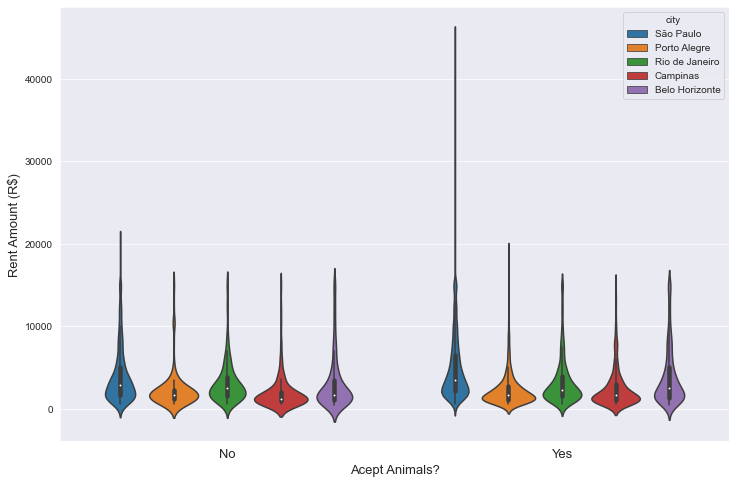

In [70]:
ax = sns.violinplot(x ='animal', y ='rent_amount',
data = houses, hue ='city')
ax.figure.set_size_inches(12, 8)
ax.set_xlabel('Acept Animals?', fontsize=13)
ax.set_ylabel('Rent Amount (R$)', fontsize=13)
ax.set_xticklabels(['No','Yes'], fontsize=13)
ax

Text(0, 0.5, 'Size of Area')

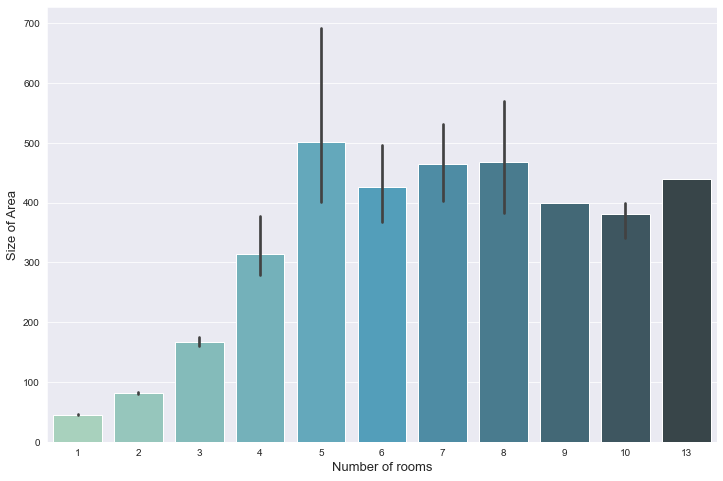

In [71]:
ax = sns.barplot(x='rooms', y='area', data = houses, 
palette = 'GnBu_d')
ax.figure.set_size_inches(12, 8)
ax.set_xlabel('Number of rooms', fontsize=13)
ax.set_ylabel('Size of Area', fontsize=13)

Text(0, 0.5, 'Homeowners association tax (R$)')

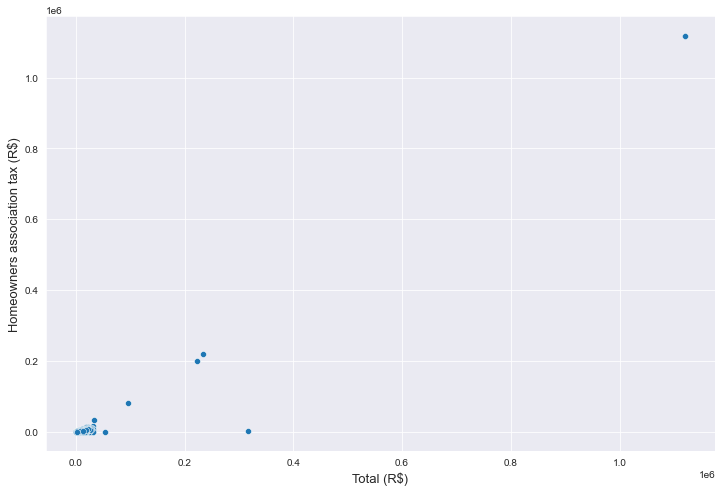

In [72]:
ax = sns.scatterplot(x = 'total', y = 'hoa', data = houses)
ax.figure.set_size_inches(12, 8)
ax.set_xlabel('Total (R$)', fontsize=13)
ax.set_ylabel('Homeowners association tax (R$)', fontsize=13)


Text(0, 0.5, 'Homeowners association tax (R$)')

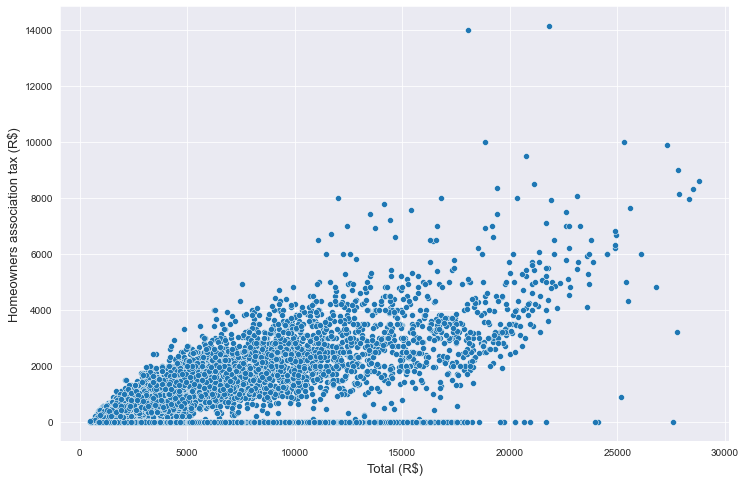

In [73]:
houses = houses.drop(labels=houses[(houses['hoa'] > 300000)].index)
houses = houses.drop(labels=houses[(houses['total'] > 30000)].index)
ax = sns.scatterplot(x = 'total', y = 'hoa', data = houses)
ax.figure.set_size_inches(12, 8)
ax.set_xlabel('Total (R$)', fontsize=13)
ax.set_ylabel('Homeowners association tax (R$)', fontsize=13)

<AxesSubplot:>

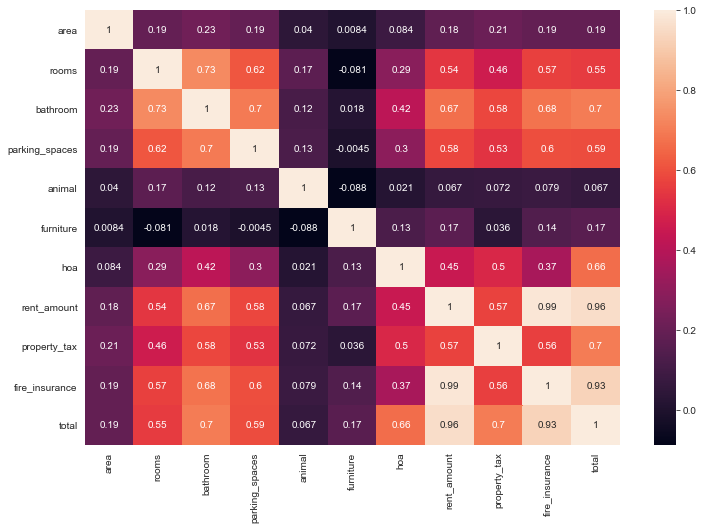

In [74]:
plt.figure(figsize=(12,8))
sns.heatmap(houses.corr(), annot=True)

In [75]:
houses.floor.replace(['-'],[0], inplace = True)
houses = houses.astype({'floor':'int64' ,'animal':'int64', 'furniture':'int64'})
houses.drop(inplace = True,
labels=houses[(houses['floor'] == 301)].index)

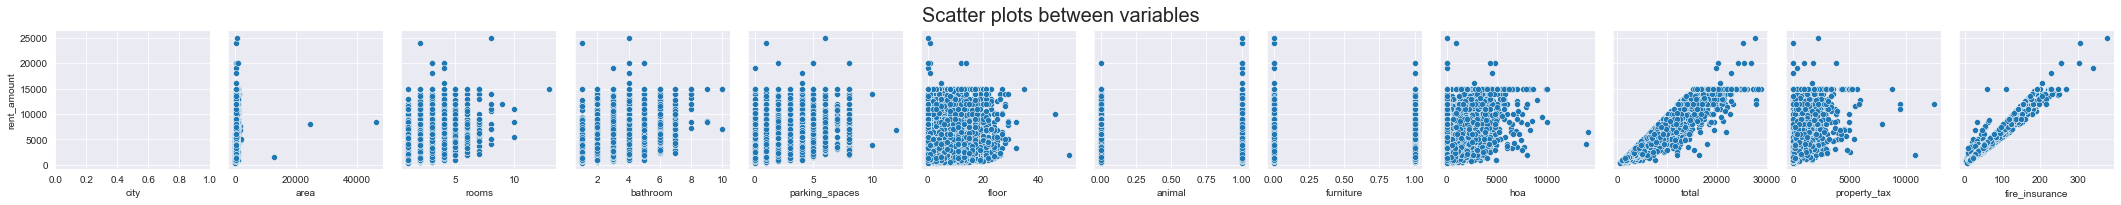

In [76]:
ax = sns.pairplot(houses, y_vars='rent_amount', x_vars=['city', 'area', 'rooms', 'bathroom', 'parking_spaces', 'floor', 'animal', 'furniture', 'hoa', 'total', 'property_tax', 'fire_insurance'])
ax.fig.suptitle('Scatter plots between variables', fontsize=20, y=1.1)
ax

In [77]:
metrics = [] #list with RMSE values
y = houses['rent_amount'] #Creating a Series for target variable
#Creating a DF for explanatory variables
x = houses.drop(['rent_amount','city','parking_spaces','area',
'bathroom','furniture','animal','floor','rooms', 'total'], axis = 1)
#Splitting data arrays into two subset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 8)
reg = LinearRegression() #Instantiating the model 
reg.fit(x_train, y_train) #Training data
predict = reg.predict(x_test) 
#add a constant and looking the summary
x_train_constant = sm.add_constant(x_train)
model_sm = sm.OLS(y_train, x_train_constant, hascont = True).fit()
print(model_sm.summary())
#looking the metrics
print('MAE: ', mean_absolute_error(y_test, predict).round(3))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, predict)).round(3))
print('R2:', r2_score(y_test, predict).round(3))
metrics.append(np.sqrt(mean_squared_error(y_test, predict)))

                            OLS Regression Results                            
Dep. Variable:            rent_amount   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                 1.588e+05
Date:                Mon, 08 Mar 2021   Prob (F-statistic):               0.00
Time:                        22:02:12   Log-Likelihood:                -55668.
No. Observations:                7474   AIC:                         1.113e+05
Df Residuals:                    7470   BIC:                         1.114e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -17.4261      7.623     -2.

In [78]:
new_houses = houses.copy()
features = ['floor','bathroom','rooms','area','parking_spaces',
'hoa', 'rent_amount', 'property_tax', 'fire_insurance']
for item in features:
    new_houses[item] = np.log1p(new_houses[item])

In [79]:
new_houses = pd.get_dummies(new_houses)
new_houses.head()

,area,rooms,bathroom,parking_spaces,floor,animal,furniture,hoa,rent_amount,property_tax,fire_insurance,total,city_Belo Horizonte,city_Campinas,city_Porto Alegre,city_Rio de Janeiro,city_São Paulo
0,4.262680,1.098612,0.693147,0.693147,2.079442,1,1,7.633370,8.101981,5.356586,3.761200,5618,0,0,0,0,1
1,5.771441,1.609438,1.609438,0.000000,3.044522,1,0,7.090910,8.509363,7.467942,4.158883,7973,0,0,0,0,1
2,4.394449,0.693147,0.693147,0.693147,1.945910,1,0,6.908755,7.937732,0.000000,3.737670,3841,0,0,1,0,0
3,3.951244,1.098612,0.693147,0.000000,1.098612,1,0,5.602119,7.014814,3.135494,2.890372,1421,0,0,1,0,0
4,3.258097,0.693147,0.693147,0.000000,0.693147,0,0,0.000000,6.685861,3.258097,2.484907,836,0,0,0,0,1


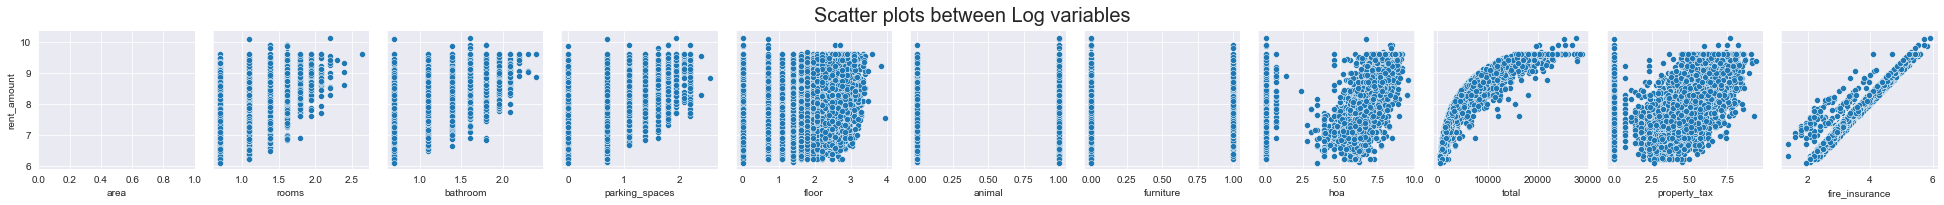

In [80]:
ax = sns.pairplot(new_houses, y_vars='rent_amount',
x_vars = ['area', 'rooms', 'bathroom', 'parking_spaces', 'floor', 'animal', 'furniture', 'hoa', 'total', 'property_tax', 'fire_insurance'])
ax.fig.suptitle('Scatter plots between Log variables',
fontsize=20, y=1.1)
ax


In [82]:
y = new_houses['rent_amount']
x = new_houses.drop(['rent_amount','animal','rooms','total','area'], axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 8)
reg = LinearRegression()
reg.fit(x_train, y_train)
predict = reg.predict(x_test)
x_train_constant = sm.add_constant(x_train)
model_sm = sm.OLS(y_train, x_train_constant, hascont = True).fit()
print(model_sm.summary())
print('MAE: ', mean_absolute_error(y_test, predict).round(3))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, predict)).round(3))
print('R2:', r2_score(y_test, predict).round(3))
metrics.append(np.sqrt(mean_squared_error(y_test, predict)))

                            OLS Regression Results                            
Dep. Variable:            rent_amount   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                 4.007e+04
Date:                Mon, 08 Mar 2021   Prob (F-statistic):               0.00
Time:                        22:02:30   Log-Likelihood:                 6515.9
No. Observations:                7474   AIC:                        -1.301e+04
Df Residuals:                    7462   BIC:                        -1.292e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   3.4699    

In [83]:
group = houses.groupby('city')['rent_amount']
Q1 = group.quantile(.25)
Q3 = group.quantile(.75)
IIQ = Q3 - Q1
down_limit = Q1 - 1.5* IIQ
up_limit = Q3 + 1.5* IIQ

In [84]:
new_df = pd.DataFrame() #Creating a empty df
for city in group.groups.keys():
    cities = houses['city'] == city #selecting boolean values 
    limits = (houses['rent_amount'] >= down_limit[city]) &                                                           (houses['rent_amount'] <= up_limit[city]) #put the boxplot limits
    queries = cities & limits #query cities and limits
    selected = houses[queries] #put the query above in houses
new_df = pd.concat([new_df, selected]) #concatenating the empty df in the df who I processed

<AxesSubplot:xlabel='City', ylabel='Rent Amount (R$)'>

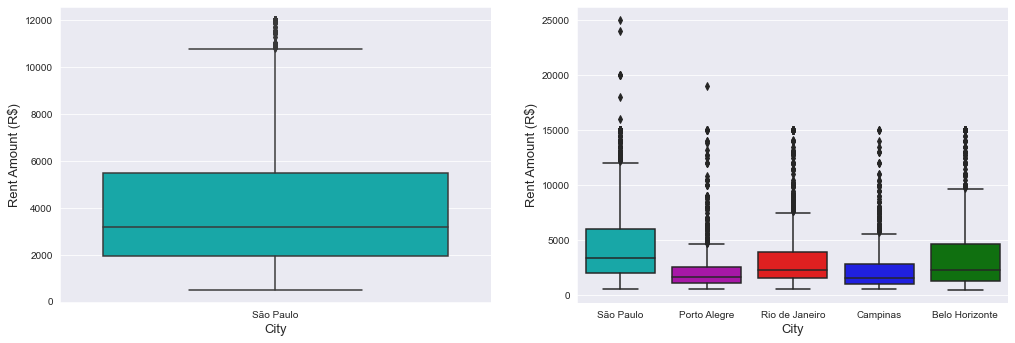

In [85]:
plt.figure(figsize=(17,12))
color = {'Belo Horizonte':'g', 'Campinas':'b', 'Porto Alegre':'m',
'Rio de Janeiro':'r', 'São Paulo':'c'}
plt.subplot(2, 2, 1)
ax = sns.boxplot(x = 'city', y = 'rent_amount', data = new_df, palette = color)
ax.set_xlabel('City', fontsize=13)
ax.set_ylabel('Rent Amount (R$)', fontsize=13)
plt.subplot(2, 2, 2)
ax = sns.boxplot(x = 'city', y = 'rent_amount', data = houses, palette = color)
ax.set_xlabel('City', fontsize=13)
ax.set_ylabel('Rent Amount (R$)', fontsize=13)
ax

In [86]:
features = ['floor','bathroom','rooms','parking_spaces',
'hoa', 'rent_amount', 'property_tax', 'fire_insurance']
for item in features:
     new_df[item] = np.log1p(new_df[item])

In [87]:
y = new_df['rent_amount']
x = new_df.drop(['rent_amount','city','rooms','area','total'],
axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 8)

In [88]:
reg = LinearRegression()
reg.fit(x_train, y_train)
predict = reg.predict(x_test)
x_train_constant = sm.add_constant(x_train)
model_sm = sm.OLS(y_train, x_train_constant, hascont = True).fit()
print(model_sm.summary())
print('MAE: ', mean_absolute_error(y_test, predict).round(3))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, predict)).round(3))
print('R2:', r2_score(y_test, predict).round(3))
metrics.append(np.sqrt(mean_squared_error(y_test, predict)))

                            OLS Regression Results                            
Dep. Variable:            rent_amount   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                 1.965e+04
Date:                Mon, 08 Mar 2021   Prob (F-statistic):               0.00
Time:                        22:02:49   Log-Likelihood:                 3420.4
No. Observations:                4451   AIC:                            -6823.
Df Residuals:                    4442   BIC:                            -6765.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              4.2630      0.011    382.

C:\Users\Nandha\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Residuals')

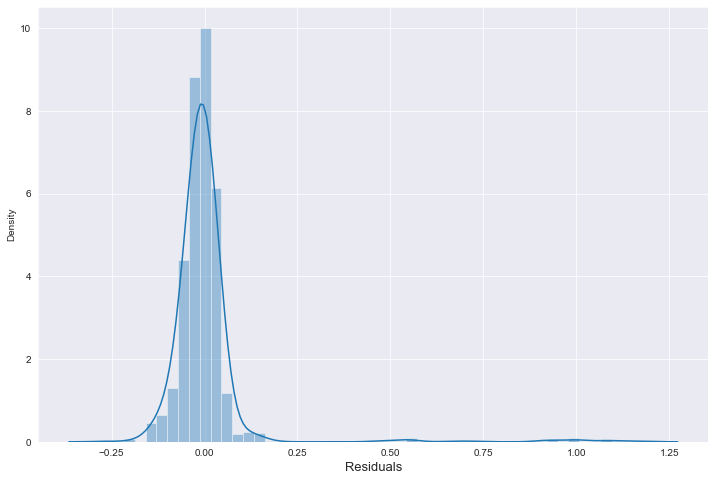

In [89]:
resid = y_test - predict
ax = sns.distplot(resid)
ax.figure.set_size_inches(12,8)
ax.set_xlabel('Residuals', fontsize=13)

In [90]:
x.columns

Index(['bathroom', 'parking_spaces', 'floor', 'animal', 'furniture', 'hoa',
       'property_tax', 'fire_insurance'],
      dtype='object')

In [91]:
index = ['Intercept','Log bathroom', 'Log parking_spaces','Log floor','Log Animal','Log furniture', 'Log hoa',
'Log property_tax','Log fire_insurance']
pd.DataFrame(data=np.append(reg.intercept_, reg.coef_), index=index, columns=['Parâmetros'])

,Parâmetros
Intercept,4.262971
Log bathroom,0.024626
Log parking_spaces,0.011149
Log floor,0.020773
Log Animal,0.004417
Log furniture,0.027042
Log hoa,0.016518
Log property_tax,-0.003762
Log fire_insurance,0.970408


C:\Users\Nandha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Prediction Rent amount', ylabel='rent_amount'>

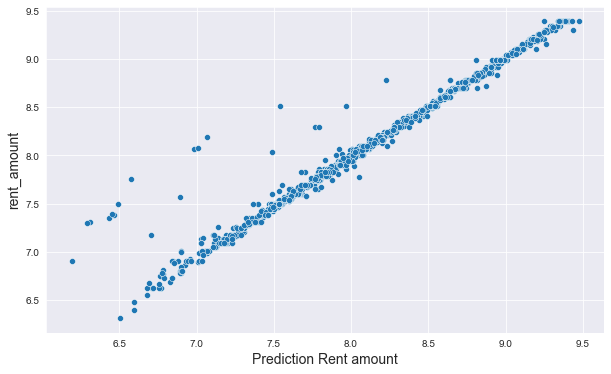

In [92]:
plt.figure(figsize=(10,6))
plt.xlabel('Prediction Rent amount', fontsize = 14)
plt.ylabel('rent_amount', fontsize = 14)
sns.scatterplot(predict, y_test)

In [93]:
attempts = ['first','second','third','fourth']
for attempt, metric in zip(attempts, metrics):
    print(attempt, ':', metric)

first : 462.258908052961
second : 0.11002111438294103
third : 0.11002111438294103
fourth : 0.12151142165277141
